# Objetivos deste trabalho
- Familiarizar-se com a biblioteca PyTorch
- Definir arquiteturas MLP simples em PyTorch
- Treinar utilizando CIFAR10, testando diferentes arquiteturas, parâmetros, funções de loss e otimizadores
- Comparar os resultados obtidos utilizando apenas Perpceptrons

In [0]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

In [2]:
# Carregar os datasets

transform=transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

dataset_valid, dataset_train = torch.utils.data.random_split(dataset_train, [5000, 45000])

Files already downloaded and verified
Files already downloaded and verified


In [0]:
train_loader = DataLoader(dataset=dataset_train, shuffle=True, batch_size=256)
valid_loader = DataLoader(dataset=dataset_valid, shuffle=False, batch_size=256)
test_loader = DataLoader(dataset=dataset_test, shuffle=False, batch_size=256)

In [0]:
# Definir a arquitetura MLP

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32*32, 80)
        self.fc2 = nn.Linear(80, 70)
        self.fc3= nn.Linear(70, 50)
        self.fc4= nn.Linear(50, 10)  
        self.activation_function = nn.ReLU()
        
    def forward(self, x):
        x = x.view(-1, 32*32)
        x = self.activation_function(self.fc1(x))
        x = self.activation_function(self.fc2(x))
        x = self.activation_function(self.fc3(x))
        x = self.activation_function(self.fc4(x))
        #x = self.activation_function(self.fc5(x))
        return x

In [5]:
model = MLP()
print(model)

MLP(
  (fc1): Linear(in_features=1024, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=70, bias=True)
  (fc3): Linear(in_features=70, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
  (activation_function): ReLU()
)


In [0]:
# Definir otimizador e loss
# Nota: testar outros otimizadores e funções de loss (em particular cross entropy)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

#optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

loss_fn = torch.nn.CrossEntropyLoss()

#loss_fn = torch.nn.MSELoss()

In [7]:
# Realizar o treinamento aqui

epochs = 100
one_hot = torch.eye(10)
media_losses = []
media_ac = []


for epoch in range(epochs): 
  
  model.train()
  losses = []
  correct = 0
  #total = 0
  for img, category in train_loader:
        
    #zera o gradiente no começo do batch
    optimizer.zero_grad()
    
    ys = model(img)
    
    #one_hot_category = one_hot[category] # apenas para quando for usar MSELoss

    loss = loss_fn(ys, category #one_hot_category)
    
    

    loss.backward()
    
    losses.append(loss.item())

    optimizer.step()
    
    #_, predicted = torch.max(ys.data, 1) # pega o segundo argumento que retorna de torch.max
    # correct += (predicted == category).sum().item()
    #total += category.size(0)
    
    
    #print(one_hot_category, category)
    
  
 #ac = correct/len(train_loader)
  #media_ac.append(ac)
   #print("epoch : {}, train loss : {:.4f}, acc_train : {:.2f}%".format(epoch, np.mean(losses), ac))
  
  print("Época: ", epoch+1," ", "Loss: ", np.mean(losses)) # importante mencionar que está sendo printada a média dos losses
    
  media_losses.append(np.mean(losses)) # losses para o plot mais embaixo
  
  

Época:  1   Loss:  2.2172561572356657
Época:  2   Loss:  2.125988792289387
Época:  3   Loss:  2.0804849314418705
Época:  4   Loss:  2.0484395108439704
Época:  5   Loss:  1.983842713589018
Época:  6   Loss:  1.945270985364914
Época:  7   Loss:  1.919635377146981
Época:  8   Loss:  1.9006481590596112
Época:  9   Loss:  1.8805067424069752
Época:  10   Loss:  1.865356064655564
Época:  11   Loss:  1.851443275809288
Época:  12   Loss:  1.836578407748179
Época:  13   Loss:  1.8267145793546329
Época:  14   Loss:  1.8149135939099572
Época:  15   Loss:  1.808216628703204
Época:  16   Loss:  1.7979534769600087
Época:  17   Loss:  1.7888574342836032
Época:  18   Loss:  1.7785804183645681
Época:  19   Loss:  1.7677046047015623
Época:  20   Loss:  1.768273357640613
Época:  21   Loss:  1.7603198052807287
Época:  22   Loss:  1.7499599301002242
Época:  23   Loss:  1.7480204288255086
Época:  24   Loss:  1.7385176901112904
Época:  25   Loss:  1.7257301326502452
Época:  26   Loss:  1.7253597541288896
Époc

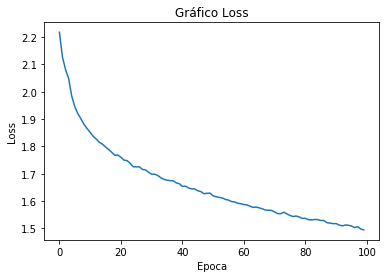

In [8]:
#graphs

import matplotlib.pyplot as plt
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.title("Gráfico Loss")
plt.plot(media_losses)
plt.show()



In [9]:
# Avaliar o modelo aqui (no conjunto de avaliação)
correct = 0
valid_losses = []
total = 0

model.eval()

with torch.no_grad():
    for images, category in valid_loader:
                y = model(images)

                #one_hot_category = one_hot[category]
                loss = loss_fn(y, category)


                valid_losses.append(loss.item())

                _, predicted = torch.max(y.data, 1)
                correct += (predicted == category).sum().item()
                total += category.size(0)
      
#ac = correct/len(valid_loader)
ac = correct/total
print("Loss_valid: ", np.mean(valid_losses), " ", "Accuracy_valid: ", ac)

correct = 0

Loss_valid:  1.8225641965866088   Accuracy_valid:  0.3982


In [10]:
# Testar o modelo aqui 


test_losses = []
total = 0

with torch.no_grad():
    for images, category in test_loader:
                yt = model(images)

                #one_hot_category = one_hot[category]
                loss = loss_fn(yt, category)


                test_losses.append(loss.item())

                _, predicted = torch.max(yt.data, 1)
                correct += (predicted == category).sum().item()
                total += category.size(0)



ac = correct/total 

#ac = correct/len(test_loader)
print("Loss_test: ", np.mean(test_losses), " ", "Accuracy_test: ", ac)

Loss_test:  1.8141047567129136   Accuracy_test:  0.391


In [11]:
# Resultados obtidos:

# ---> MLP com 1 camada(s)(20) oculta(s) de 20 perceptrons + SGD + MSELoss + ReLU(sem particionar o dataset de treino): 
###### Loss_train = 0.08425  
###### Loss_valid = 0       ###### Accuracy_valid = 0
###### Loss_test  = 0.08443 ###### Accuracy_test =  0.5806


# ---> MLP com 1 camada(s)(20) oculta(s) de 20 perceptrons + SGD + MSELoss + ReLU(particionando o dataset de treino*): 
###### Loss_train = 0.0846 
###### Loss_valid = 0.0847 ###### Accuracy_valid = 0.2844
###### Loss_test  = 0.0849 ###### Accuracy_test  = 0.2868


# ---> MLP com 1 camada(s)(20) oculta(s) de 20 perceptrons + SGD + CrossEntropyLoss* + ReLU(particionando o dataset de treino):
###### Loss_train = 1.9290 
###### Loss_valid = 1.9698 ###### Accuracy_valid = 0.336
###### Loss_test  = 1.9513 ###### Accuracy_test  = 0.3353



# ---> MLP com 1 camada(s)(20) oculta(s) de 20 perceptrons + Adam + CrossEntropyLoss* + ReLU(particionando o dataset de treino):
###### Loss_train = 1.9606 
###### Loss_valid = 2.0047 ###### Accuracy_valid = 0.3042
###### Loss_test  = 2.0014 ###### Accuracy_test  = 0.3032


# ---> MLP com 2 camada(s) oculta(s)(50 e 20) de 20 perceptrons + Adam + CrossEntropyLoss + ReLU(particionando o dataset de treino):
###### Loss_train = 1.7311 
###### Loss_valid = 1.8388 ###### Accuracy_valid = 0.3738
###### Loss_test  = 1.8464 ###### Accuracy_test  = 0.3585


# ---> MLP com 2 camada(s) oculta(s)(50 e 20) de 20 perceptrons + SGD* + MSELoss* + ReLU(particionando o dataset de treino):
###### Loss_train = 0.0936 
###### Loss_valid = 0.0938 ###### Accuracy_valid = 0.18
###### Loss_test  = 0.0934 ###### Accuracy_test  = 0.1816


# ---> MLP com 4 camada(s) ocultas(100 80 50 e 20) de 20 perceptrons + SGD + MSELoss + ReLU(particionando o dataset de treino):
###### Loss_train = 1.9197 
###### Loss_valid = 1.9108 ###### Accuracy_valid = 0.3156
###### Loss_test  = 1.9309 ###### Accuracy_test  = 0.3026


#****** ---> MLP com 4 camada(s) ocultas(100 80 50 e 20) de 20 perceptrons + Adam* + CrossEntropyLoss* + ReLU(particionando o dataset de treino):
###### Loss_train = 1.5833 
###### Loss_valid = 1.9346 ###### Accuracy_valid = 0.358
###### Loss_test  = 1.9337 ###### Accuracy_test  = 0.3708




'''test
'''


's\nsfafs\n'

#Conclusões

Depois de testar os diversos parâmetros da MLP é possível perceber a tamanha diversidade e opções para moldá-la de acordo com o domínio ou projeto, o que é muito bom comparado ao modo que faziamos no perceptron. No primeiro trabalho foi difícil e demorado de fazer cada neurônio separado e depois juntá-los, porém no final tinhamos a melhor resposta possível(tirando o fato de ajustar apenas o neta). 

Entretanto, na MLP, é possível alterar diversos aspectos, como a arquitetura, tipo de loss, tipo de optimizador, porém é mais fácil e rápido de implementar, graças ao pytorch. Por outro lado, se perde muito tempo achando os parâmetros certos para que a rede consiga atingir o máximo de acurácia possível(no caso esperar que o treinamento acabe). 


É preciso mencionar também que a acurácia baixou drasticamente com o particionamento dos exemplos de treinamento e avaliação. O que eu já sabia que ia acontecer, entretanto seja melhor botar mais exemplos no treinamento já que eu apenas separei alguns para a avaliação.

E sobre o modelo final que escolhi como um dos melhores, foi o que possuia 4 camadas ocultas, sendo elas respectivamente de tamanhos: 100, 80, 50, 20. Eu optei em fazer uma escada como foi recomendado em aula, justamente pelo fato do aprendizado da rede neural ser como uma, onde se aprende o básico e depois irá subir até convergir para uma saída/porta. 

Eu comecei a usar o MSELoss mas depois de tentar todas as combinações cheguei a conclusão que o CrossEntropy é muito bom para a rede, pois observei que a Loss converge muito mais rápido do que o MSE. E também como vimos em aula o CrossEntropy é o mais recomendado para problemas de classificação.

O otimizador que estou usando é o Adam, que foi muito bem combinado com o CrossEntropy.(Dados das redes célula a cima)

Depois de definir qual loss e qual otimizador, testei várias arquiteturas. A partir da 3 camada oculta não dava tanto avanço nos resultados. Então optei por deixar ela pequena com 3 camadas de 80, 70 e 50, respectvamente. E os resultados foram os seguintes:


#MLP(
  (fc1): Linear(in_features=1024, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=70, bias=True)
  (fc3): Linear(in_features=70, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
  (activation_function): ReLU()
#)

#-----


>Média do Loss no treinamento: 1.4947


>Média da Loss na Avaliação:     1.8225


>Média da Loss no Teste:            1.8141


#-----


>Acurácia na Avaliação:               39,82%

>Acurácia no Teste:                      39,1%

